### Aim - Implementing my own logistic regression to predict the species of the Iris flower.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# Load the Iris dataset
iris = load_iris()

In [52]:
# Create a pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column to the DataFrame
iris_df['target'] = iris.target

In [53]:
# Drop the third category (i.e., Verginica)
iris_df_filtered = iris_df[iris_df['target'] != 2]

In [54]:
iris_df_filtered.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### X and y array

In [55]:
X = iris_df_filtered.drop('target', axis = 1)
y = iris_df_filtered['target']

### Train Test Split

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
class LogisticRegression:
    
    def __init__(self, learning_rate = 0.01, num_iterations = 1000):
        
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # X -> feature matrix (input_data)
        # y -> target vector
        num_samples, num_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        
        self.bias = 0
        
        # Gradient descent optimzation
        
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(z)  # Invoking or calling sigmoid method
            
            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions) - y)
            db = (1 / num_samples) * np.sum(predictions -y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return (predictions > 0.5).astype(int)
          

In [58]:
# Initialize and train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

In [59]:
# Make predictions
predictions = model.predict(X_test)
print(predictions)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0]


In [60]:
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [61]:
cm = classification_report(y_test, predictions)

print("\nClassification Report:\n", cm)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### Logistic Regression from the scikit-learn library.

In [63]:
# Initialize the logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [64]:
classification_report_str = classification_report(y_test, y_pred)

print("\nClassification Report:\n", classification_report_str)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



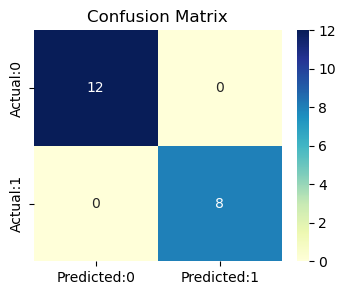

In [73]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame for the confusion matrix
conf_matrix_data = {
    'Predicted:0': cm[:, 0],
    'Predicted:1': cm[:, 1]
}

conf_matrix = pd.DataFrame(data=conf_matrix_data, index=['Actual:0', 'Actual:1'])

# Plot the heatmap with decreased size
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

plt.title('Confusion Matrix')
plt.show()

## Conclusion

In summary, the results from the classification report provide strong evidence that the logistic regression model successfully predicts the species of flowers between Setosa and Versicolor, showcasing its reliability and accuracy in this particular classification task.